# Input dataset

In [175]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [176]:
# load dataset
dt = pd.read_csv("/content/drive/MyDrive/Dataset/salary_data.csv")
# view dataset
dt

,employee_id,experience_years,salary
0,EM_101,16.8,3166.9
1,EM_102,10.7,3126.9
2,EM_103,14.1,3278.8
3,EM_104,9.1,2828.8
4,EM_105,8.9,2728.7
...,...,...,...
95,EM_196,12.1,3119.2
96,EM_197,14.3,3399.5
97,EM_198,2.8,1596.0
98,EM_199,18.6,3051.2


# Preprocessing

In [177]:
df = dt.copy()

In [178]:
# view dataset describtions
df.describe()

,experience_years,salary
count,100.000000,100.000000
mean,10.032000,2663.418000
std,5.804733,664.867378
min,0.000000,1046.400000
25%,5.025000,2192.750000
50%,10.000000,2984.150000
75%,14.975000,3174.500000
max,20.000000,3405.800000


In [179]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   employee_id       100 non-null    object 
 1   experience_years  100 non-null    float64
 2   salary            100 non-null    float64
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


In [180]:
# Missing Value
df.isna().sum()

,0
employee_id,0
experience_years,0
salary,0


In [181]:
# View the number of rows and columns
df.shape

(100, 3)

In [182]:
# Data duplicated
df.duplicated().sum()

1

In [183]:
# Remove data duplicated
df.drop_duplicates(inplace=True)

In [184]:
# Recheck data duplicated
df.duplicated().sum()

0

In [185]:
# Recheck the number of rows and columns
df.shape

(99, 3)

## Split Dataset

In [186]:
# X and y variables for split data
X = df['experience_years']
y = df['salary']

In [187]:
#Split dataset train dan test 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [188]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(79,)
(79,)
(20,)
(20,)


In [189]:
# Reshape because we only have single features.
# This is not needed if our features is 2 or more
X_train_reshape = X_train.values.reshape(-1, 1)
X_test_reshape = X_test.values.reshape(-1, 1)

# Model

**Linear Regression**

In [190]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [191]:
model_lr = LinearRegression()
model_lr.fit(X_train_reshape, y_train)

LinearRegression()

In [192]:
y_test_pred = model_lr.predict(X_test_reshape)
y_test_pred

array([2524.29774437, 2648.10039856, 3102.04346391, 1874.33380988,
       3545.66964142, 2710.00172565, 3019.50836112, 3607.57096851,
       1998.13646407, 3359.96566014, 2606.83284716, 2297.32621169,
       2916.33948263, 2462.39641727, 2018.77023977, 2544.93152007,
       2173.5235575 , 3143.31101531, 3442.50076293, 3669.47229561])

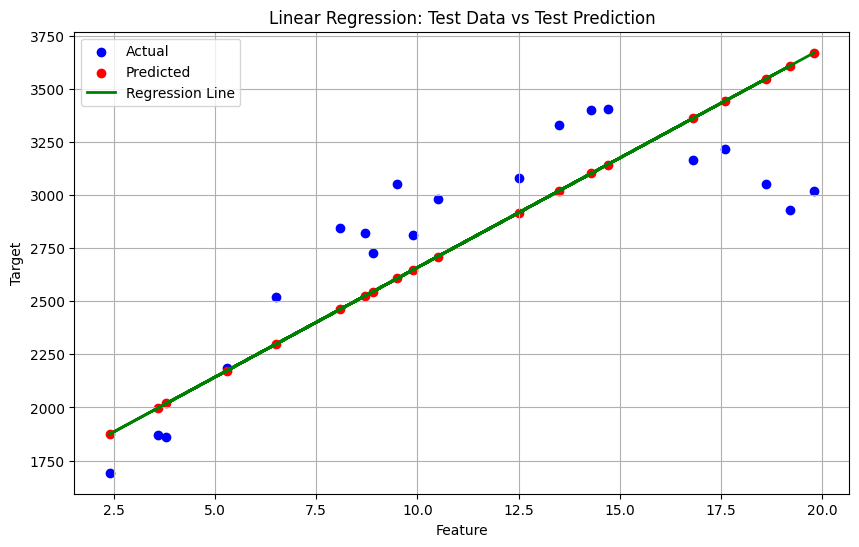

In [193]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_test_pred, color='red', label='Predicted')
plt.plot(X_test, y_test_pred, color='green', label='Regression Line', linewidth=2)  # Line for predicted values
plt.title('Linear Regression: Test Data vs Test Prediction')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()

In [194]:
# Check error rate between train_data prediction and test_data prediction
from sklearn.metrics import mean_squared_error, r2_score

y_test_pred = model_lr.predict(X_test_reshape)
y_train_pred = model_lr.predict(X_train_reshape)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"""
Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
  Gap  : {abs(mse_train - mse_test):.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
      """)


Mean Squared Error:
  Train: 113563.20
  Test : 109356.49
  Gap  : 4206.72
R^2 Score:
  Train: 0.76
  Test : 0.57
      


**Decision Tree**

In [195]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train_reshape, y_train)

DecisionTreeRegressor(random_state=42)

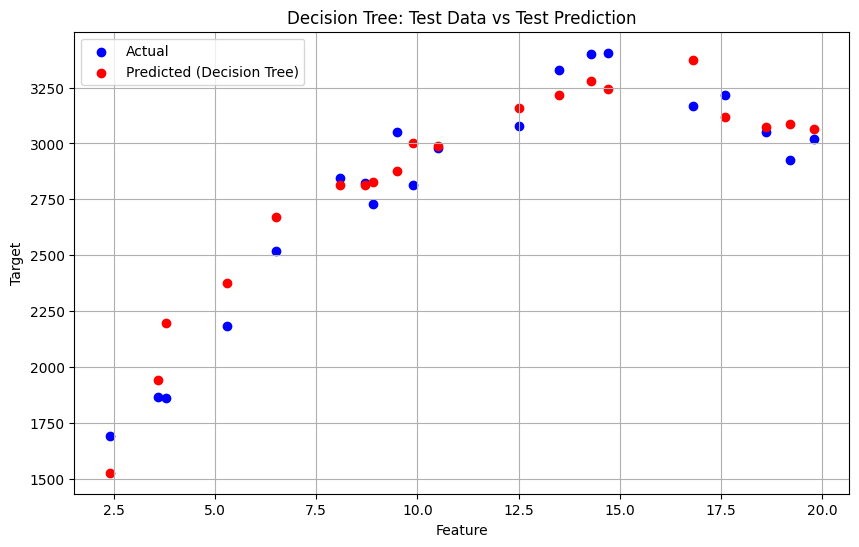

In [196]:
y_pred_dt = model_dt.predict(X_test_reshape)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_dt, color='red', label='Predicted (Decision Tree)')
plt.title('Decision Tree: Test Data vs Test Prediction')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()

In [197]:
# Check error rate between train_data prediction and test_data prediction
from sklearn.metrics import mean_squared_error, r2_score

y_test_pred = model_dt.predict(X_test_reshape)
y_train_pred = model_dt.predict(X_train_reshape)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"""
Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
  Gap  : {abs(mse_train - mse_test):.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
      """)


Mean Squared Error:
  Train: 1013.38
  Test : 21026.08
  Gap  : 20012.71
R^2 Score:
  Train: 1.00
  Test : 0.92
      


**Random Forest**

In [198]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train_reshape, y_train)

RandomForestRegressor(random_state=42)

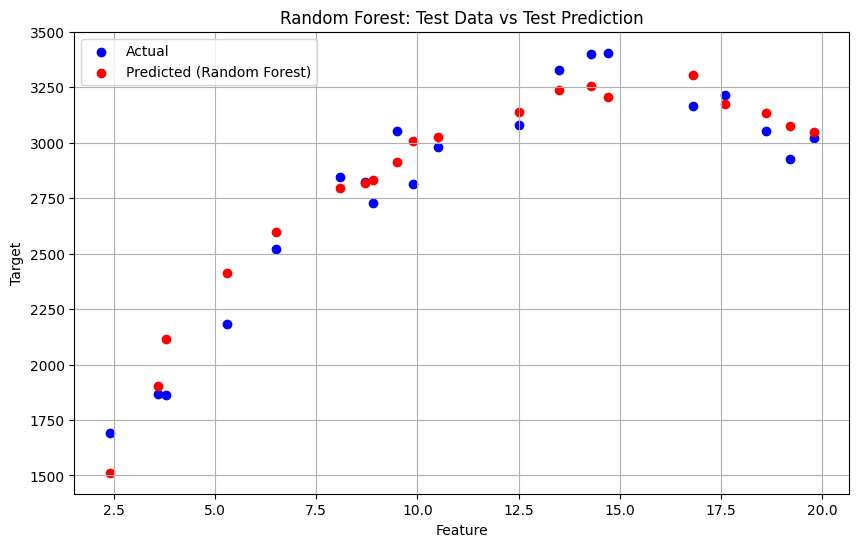

In [199]:
y_pred_rf = model_rf.predict(X_test_reshape)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_rf, color='red', label='Predicted (Random Forest)')
plt.title('Random Forest: Test Data vs Test Prediction')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()

In [200]:
# Check error rate between train_data prediction and test_data prediction
from sklearn.metrics import mean_squared_error, r2_score

y_test_pred = model_rf.predict(X_test_reshape)
y_train_pred = model_rf.predict(X_train_reshape)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"""
Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
  Gap  : {abs(mse_train - mse_test):.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
      """)


Mean Squared Error:
  Train: 5056.63
  Test : 17442.19
  Gap  : 12385.56
R^2 Score:
  Train: 0.99
  Test : 0.93
      
